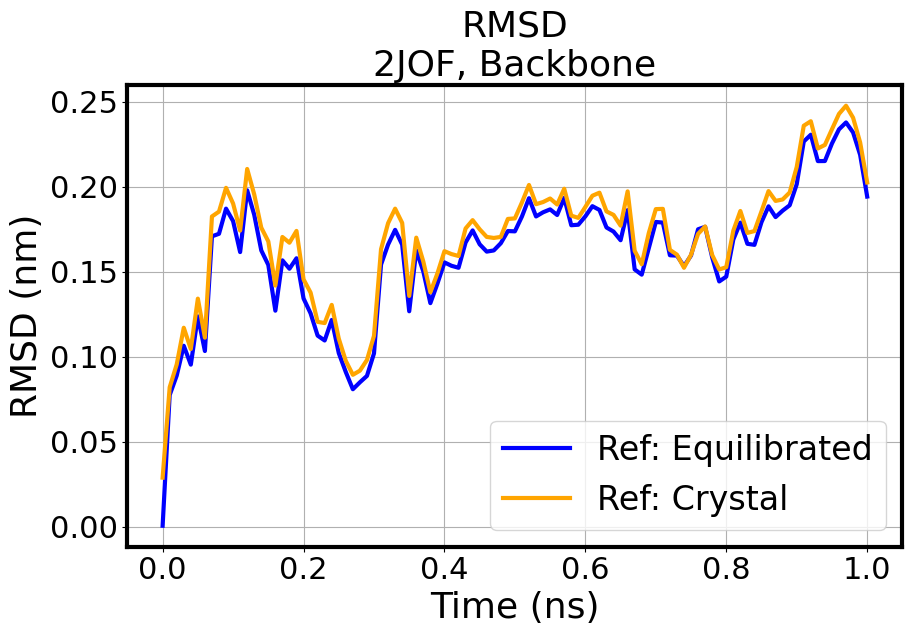

In [7]:
# Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Cell 2: Define a function to load RMSD data from an XVG file
def load_rmsd_data(file_path):
    """Load RMSD data from an XVG file."""
    data = []
    try:
        with open(file_path, 'r') as f:
            for line in f:
                if not line.startswith(('@', '#')):  # Skip comment lines
                    fields = line.split()
                    if len(fields) == 2:  # Expecting two columns
                        try:
                            time_ns = float(fields[0])   # Convert ps to ns
                            rmsd_nm = float(fields[1])  # RMSD in nm
                            data.append([time_ns, rmsd_nm])
                        except ValueError:
                            print(f"Skipping line due to conversion error: {line}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    return pd.DataFrame(data, columns=['Time (ns)', 'RMSD (nm)'])

# Cell 3: Load the RMSD data
rmsd_df = load_rmsd_data('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week3-IntroToMD/Data/rmsd.xvg')
rmsd_xtal_df = load_rmsd_data('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week3-IntroToMD/Data/rmsd_xtal.xvg')

# Cell 4: Plot the RMSD data
plt.figure(figsize=(10, 6))

if rmsd_df is not None and not rmsd_df.empty:
    plt.plot(rmsd_df['Time (ns)'], rmsd_df['RMSD (nm)'], label='Ref: Equilibrated', color='blue', linewidth=3)

if rmsd_xtal_df is not None and not rmsd_xtal_df.empty:
    plt.plot(rmsd_xtal_df['Time (ns)'], rmsd_xtal_df['RMSD (nm)'], label='Ref: Crystal', color='orange', linewidth=3)

# Adding title and labels
plt.title('RMSD\n2JOF, Backbone', fontsize=26)
plt.xlabel('Time (ns)', fontsize=26)
plt.ylabel('RMSD (nm)', fontsize=26)

# Set tick parameters for better readability
plt.tick_params(axis='both', labelsize=22)

# Enable grid and legend
plt.grid()
plt.legend(fontsize=24)
# Adjusting spine widths for a clearer border
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# 保存图像到文件
plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week3-IntroToMD/Figures/RMSD_plot.png', dpi=300, bbox_inches='tight')  # 保存为PNG文件，300 DPI清晰度
# Show the plot
plt.show()